Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.

In [3]:
from sklearn.datasets import load_boston

boston = load_boston()

Создайте датафреймы X и y из этих данных.

In [4]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Масштабируйте данные с помощью StandardScaler.

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.

In [7]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))

До:	(404, 13)
После:	(404, 2)


Постройте диаграмму рассеяния на этих данных.

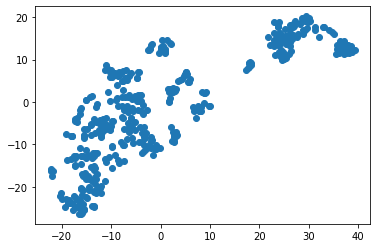

In [8]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train. Параметр max_iter должен быть равен 100, random_state сделайте равным 42.


In [9]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3,max_iter=100,random_state=42)

labels_train = kmeans.fit_predict(X_train_scaled)

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.

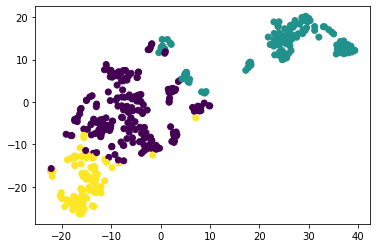

In [10]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

plt.show()

Вычислите средние значения price и CRIM в разных кластерах. (Вычислил AGE, так как price в колонках не увидел и программа ругается, возможно не совсем понял от куда его брать)

In [11]:
print('Кластер 0: {}'.format(X_train_scaled.loc[labels_train == 0, 'CRIM'].mean()))
print('Кластер 1: {}'.format(X_train_scaled.loc[labels_train == 1, 'CRIM'].mean()))
print('Кластер 2: {}'.format(X_train_scaled.loc[labels_train == 2, 'CRIM'].mean()))

Кластер 0: -0.3595938819415387
Кластер 1: 0.8109035550510459
Кластер 2: -0.3988641865191748


In [19]:
print('Кластер 0: {}'.format(y_train[labels_train == 0].mean()))
print('Кластер 1: {}'.format(y_train[labels_train == 1].mean()))
print('Кластер 2: {}'.format(y_train[labels_train == 2].mean()))

Кластер 0: 24.958115183246072
Кластер 1: 16.165354330708663
Кластер 2: 27.78837209302326


* Задание 3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.

In [27]:
labels_test = kmeans.fit_predict(X_test_scaled)

In [28]:
print('Кластер 0: {}'.format(X_test.loc[labels_test == 0, 'CRIM'].mean()))
print('Кластер 1: {}'.format(X_test.loc[labels_test == 1, 'CRIM'].mean()))
print('Кластер 2: {}'.format(X_test.loc[labels_test == 2, 'CRIM'].mean()))


Кластер 0: 9.419181842105264
Кластер 1: 0.21929690909090907
Кластер 2: 0.04070333333333334


In [30]:
print('Кластер 0: {}'.format(y_test[labels_test == 0].mean()))
print('Кластер 1: {}'.format(y_test[labels_test == 1].mean()))
print('Кластер 2: {}'.format(y_test[labels_test == 2].mean()))

Кластер 0: 16.710526315789473
Кластер 1: 22.690909090909095
Кластер 2: 34.3111111111111
